# Ball Drop Experiment

## Introduction

The objective of this experiment is to investigate the factors influencing the bounce height of balls. Specifically, we examine the impact of ground texture, ball pressure, weight, wind speed, and initial drop height on the bounce height of two types of balls: tennis balls and table tennis balls. Using a quarter fraction  $2^6$ factorial design, we try to study the main effects and potential interactions among these factors while minimizing experimental runs. 

## Data

In [43]:
library(MASS)       
library(car)        
library(ggplot2)
library(dplyr)
library(faraway)

In [44]:
data = read.csv("data.csv")
data = data|>
    select(-order)

In [45]:
data$bounce_height = as.integer(data$bounce_height)
data

ground,pressure,weight,wind,height,type,bounce_height
<int>,<int>,<int>,<int>,<int>,<int>,<int>
-1,-1,-1,-1,-1,-1,53
-1,1,-1,-1,1,1,49
-1,-1,1,-1,1,-1,105
-1,1,1,-1,-1,1,16
-1,-1,-1,1,-1,1,27
-1,1,-1,1,1,-1,80
-1,-1,1,1,1,1,47
-1,1,1,1,-1,-1,54
1,-1,-1,-1,1,1,118


## Assumption Check


Call:
lm(formula = bounce_height ~ ground + pressure + weight + wind + 
    height + type + pressure:ground + pressure:height + ground:wind + 
    pressure:weight + pressure:wind + wind:height + weight:wind, 
    data = data)

Residuals:
    1     2     3     4     5     6     7     8     9    10    11    12    13 
-3.25 -2.50  3.25  2.50  3.25  2.50 -3.25 -2.50  2.50  3.25 -2.50 -2.50 -3.25 
   14    15    16 
-3.25  2.50  3.25 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       70.750      2.050  34.510 0.000839 ***
ground            16.875      2.050   8.231 0.014441 *  
pressure          -2.125      2.050  -1.037 0.408852    
weight             2.875      2.050   1.402 0.295882    
wind              -0.375      2.050  -0.183 0.871729    
height            18.875      2.050   9.207 0.011593 *  
type              -5.875      2.050  -2.866 0.103256    
ground:pressure    2.000      2.050   0.976 0.432181    
pressure:height    1.250      2.050  

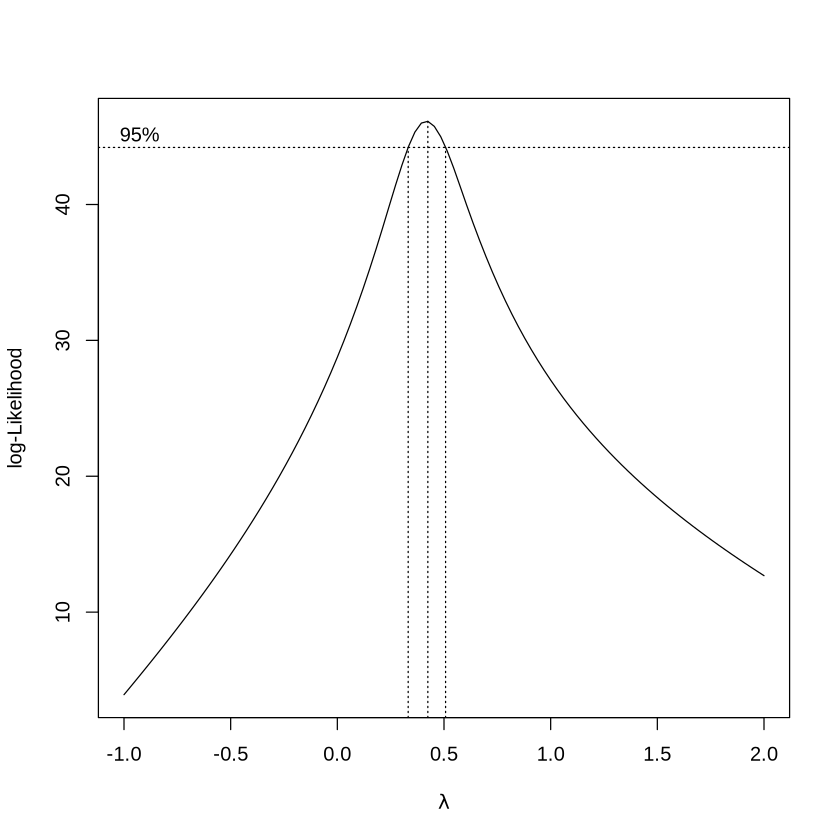

In [46]:
model = lm(bounce_height ~ ground + pressure + weight + wind + height + type + pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind, data = data)
summary(model)
boxcox_result <- boxcox(model, lambda = seq(-1, 2, 0.1))

In [47]:
data= data|>
    mutate(sqrt_bounce_height = sqrt(bounce_height))
model2 = lm(sqrt_bounce_height ~ground + pressure + weight + wind + height + type + pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind, data = data)
summary(model2)


Call:
lm(formula = sqrt_bounce_height ~ ground + pressure + weight + 
    wind + height + type + pressure:ground + pressure:height + 
    ground:wind + pressure:weight + pressure:wind + wind:height + 
    weight:wind, data = data)

Residuals:
        1         2         3         4         5         6         7         8 
-0.086498  0.009191  0.086498 -0.009191  0.086498 -0.009191 -0.086498  0.009191 
        9        10        11        12        13        14        15        16 
-0.009191  0.086498  0.009191  0.009191 -0.086498 -0.086498 -0.009191  0.086498 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.1915792  0.0434923 188.346 2.82e-05 ***
ground           1.0826281  0.0434923  24.892  0.00161 ** 
pressure        -0.1616784  0.0434923  -3.717  0.06535 .  
weight           0.1201590  0.0434923   2.763  0.10984    
wind             0.0336825  0.0434923   0.774  0.51969    
height           1.1523460  0.0434923  26.495  0.00142 ** 
type

## Half-Normal Plot

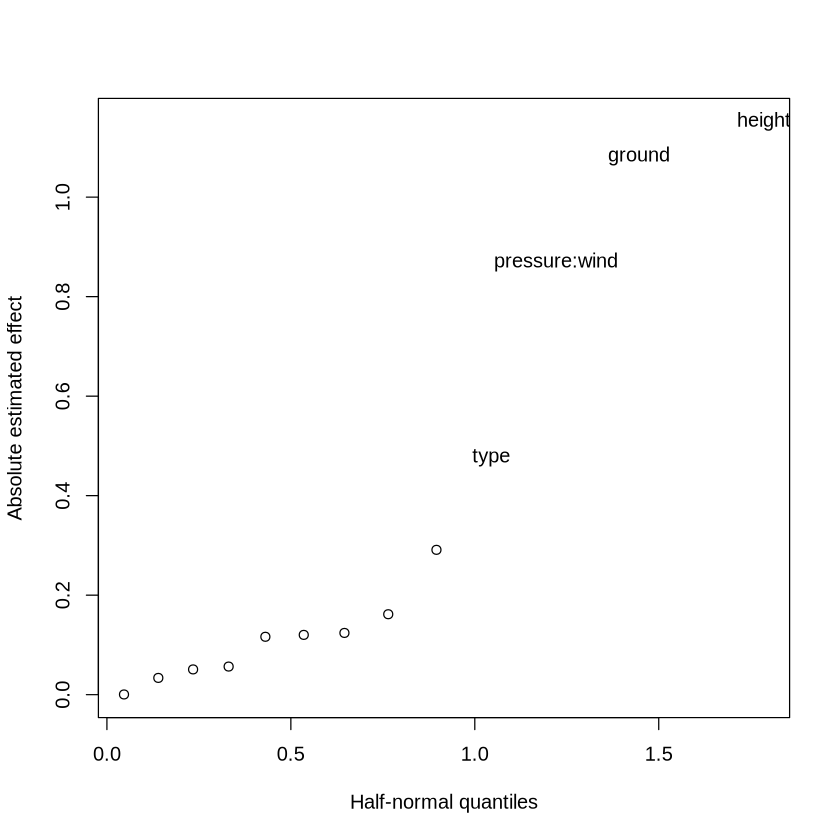

In [21]:
model2.coef <- coefficients(model2)
halfnorm(
  model2.coef[-1],
  ylab = "Absolute estimated effect",
  nlab = 4,
  labs = c(
    "ground", "pressure", "weight", "wind", "height", "type", 
    "pressure:ground", "pressure:height", "ground:wind", 
    "pressure:weight", "pressure:wind", "wind:height", 
    "weight:wind"
  )
)

## Main-Effect and Interaction Plots

### Main-Effects Plot

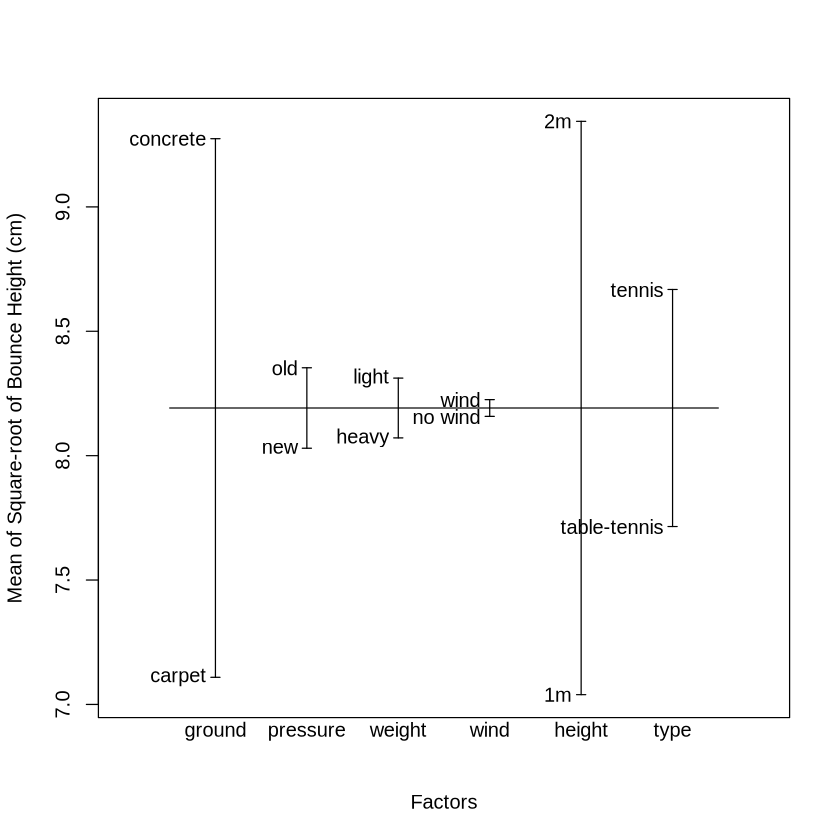

In [49]:
data$ground = factor(data$ground, labels=c("carpet","concrete"))
data$pressure = factor(data$pressure, labels=c("old", "new"))
data$weight = factor(data$weight, labels=c("heavy", "light"))
data$wind = factor(data$wind, labels=c("no wind", "wind"))
data$height = factor(data$height, labels=c("1m", "2m"))
data$type = factor(data$type, labels=c("tennis", "table-tennis"))

plot.design(sqrt_bounce_height ~ground + pressure + weight + wind + height + type + 
            pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind,
            ylab = "Mean of Square-root of Bounce Height (cm)",
            data = data)

### Interaction Plots

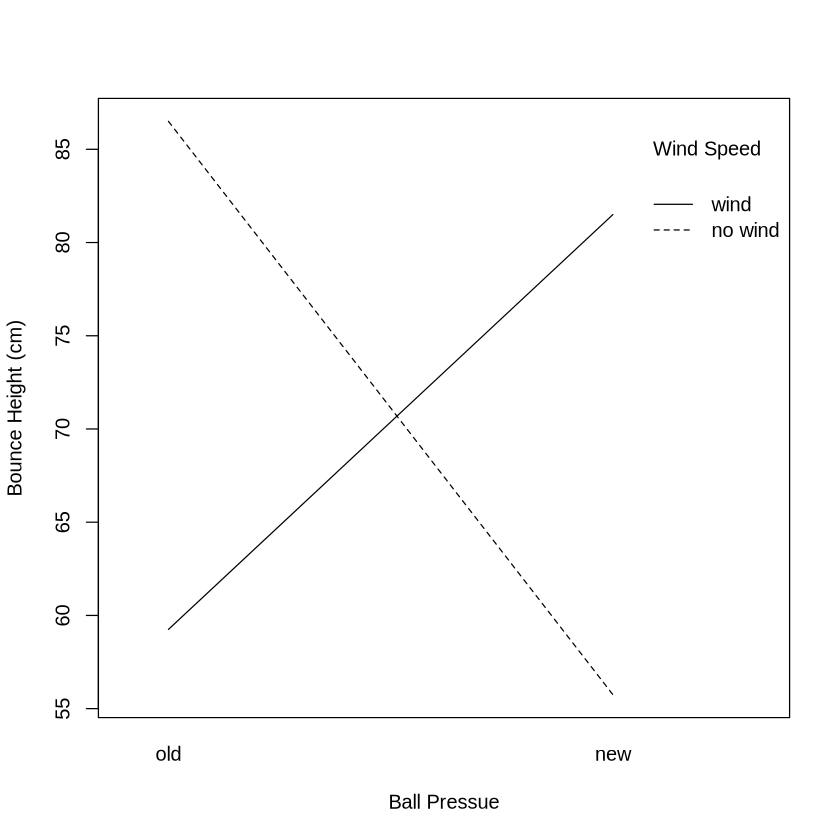

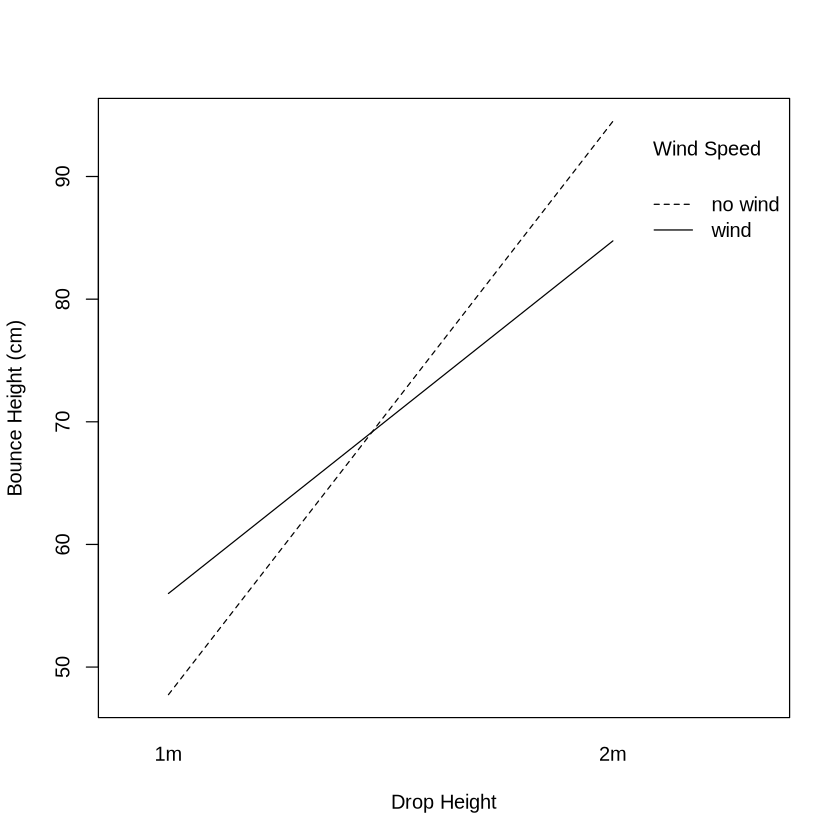

In [50]:
interaction.plot(data$pressure, data$wind, data$bounce_height, xlab="Ball Pressue", ylab="Bounce Height (cm)",trace.label="Wind Speed")

interaction.plot(data$height, data$wind, data$bounce_height, xlab="Drop Height", ylab="Bounce Height (cm)",trace.label="Wind Speed")